# Notes: Steps 1-5 are the same as before.  In Step 6, we apply different oversampling and undersampling methods (Random Oversampling, Random Undersampling, and SMOTE) for Analyzing Imbalanced Classification.

## Credit Card Default Model: Classification Analysis:
## Logistic Regression, SGD Classifiers, Decision Trees, SVM Classifier

### The original code is from "Introduction to Data Science Project Report: Part C: Machine Learning and Classification Problem" by K. Jaiswal, V. Katiyar, A. Goel, and N. Agarwal.  We modify the code for our teaching purpose.


### About the Dataset
In recent years, the credit card issuers in Taiwan faced the cash and credit card debt crisis and the delinquency is expected to peak in the third quarter of 2006 (Chou,2006). In order to increase market share, card-issuing banks in Taiwan over-issued cash and credit cards to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash–card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders

We used the [**Credit Card Default payment in Taiwan**]
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) to **predict whether the credit card holders are defaulters or Non-defaulters**. The Dataset and its attributes are described below



1. ID: ID of each client 
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

# Step 1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import uniform

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.svm import LinearSVC, LinearSVR

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN


In [2]:
# Importing the Credit Card Default Dataset
dataset = pd.read_csv('UCI_Credit_Card.csv', header=0, index_col=0, parse_dates=False)
#dataset = dataset.sample(n=2000,replace =False,random_state=1)

In [3]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
dataset.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
30000,50000.0,1,2,1,46,0,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [6]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**There are 30000 distinct credit card clients.**

**The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1,000,000.**

**Education Level is mostly graduate school and university.**

**Most of the clients are either married or single .**

**Average age is 35.5 years, with a standard deviation of 9.2**

**As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.2212 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).**

In [7]:
dataset = dataset.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
dataset.columns


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')


# Step 2: Data Visualisation and Analysis

Text(0.5, 1.0, 'Default Credit Card Clients\n (Not Default = 0, Default = 1)')

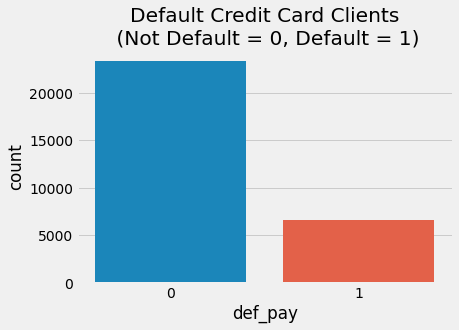

In [9]:
plt.style.use('fivethirtyeight')
sns.countplot(x='def_pay',data=dataset)
plt.title('Default Credit Card Clients\n (Not Default = 0, Default = 1)')

**Percentage of Defaulters are smaller than the Non Defaulters in the given dataset (22% vs 78%)**

<AxesSubplot:xlabel='SEX', ylabel='count'>

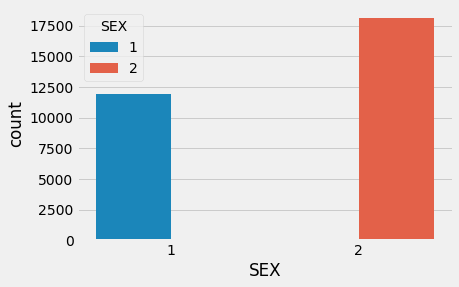

In [10]:
plt.style.use('fivethirtyeight')
sns.countplot(x='SEX',data=dataset,hue = 'SEX')

**Number of Male credit holder is less than Female**

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

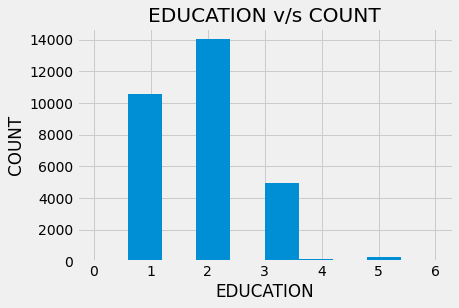

In [11]:
plt.style.use('fivethirtyeight')
dataset['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

**More number of credit holders are university students followed by Graduates and then High school students**

<AxesSubplot:xlabel='SEX', ylabel='count'>

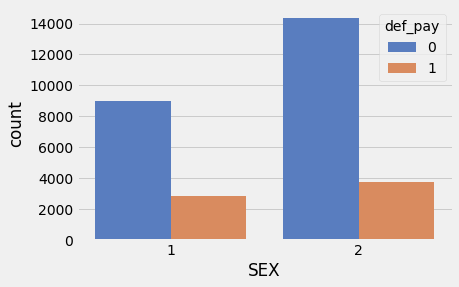

In [12]:
# Checking the number of counts of defaulters and non defaulters sexwise

sns.countplot(x='SEX', data=dataset,hue="def_pay", palette="muted")  

**It is evident from the above output that females have overall less default payments wrt males**

**Non-Defaults have a higher proportion of Females (Sex=2)**

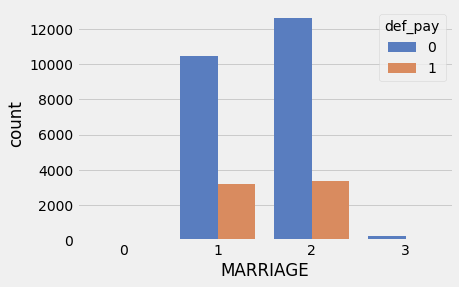

In [13]:
g=sns.countplot(x="MARRIAGE", data=dataset,hue="def_pay", palette="muted")


**From the above plot it is clear that those people who are single have less default payment than married people**

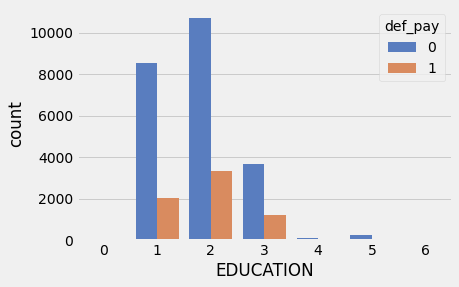

In [14]:
g=sns.countplot(x="EDUCATION", data=dataset,hue="def_pay", palette="muted")

**From the above plot it is clear that those people who are university students  have less default payment wrt graduates and high school people**

In [15]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

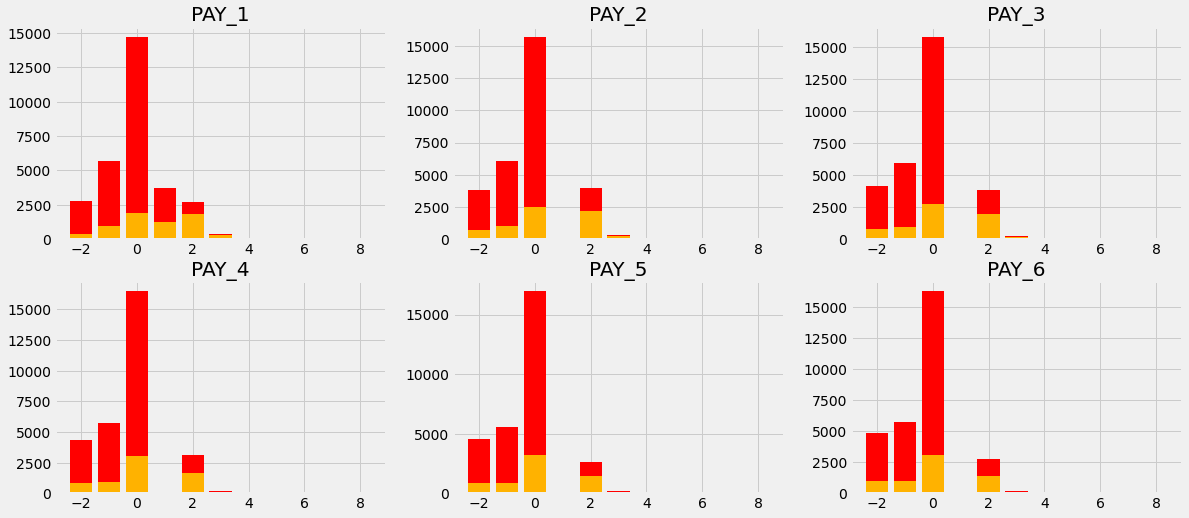

In [16]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
     
plt.show()

**The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.**

## Observing  Correlation between features of the Dataset

<AxesSubplot:title={'center':'Correlation with Default'}>

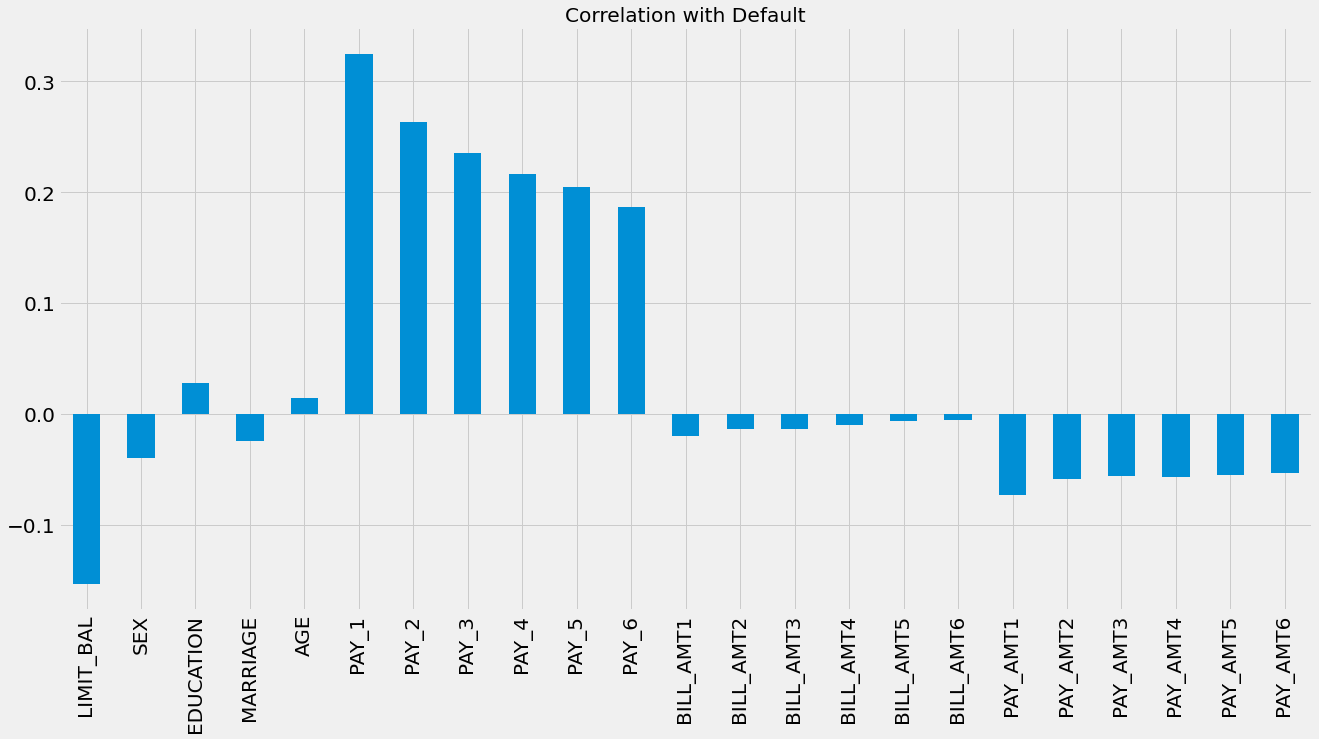

In [17]:

X = dataset.drop(['def_pay'],axis=1)
X.corrwith(dataset['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

**So it looks like the PAY_1-6 varaibles are the strongest predictors of default, followed by LIMIT_BAL.**

# Step 3: Data Cleaning

**EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.**

**MARRIAGE has a label 0 that is undocumented**

**Data Transformation**

**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**

**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**


In [18]:
fil = (dataset.EDUCATION == 5) | (dataset.EDUCATION == 6) | (dataset.EDUCATION == 0)
dataset.loc[fil, 'EDUCATION'] = 4
dataset.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [19]:
dataset.loc[dataset.MARRIAGE == 0, 'MARRIAGE'] = 3
dataset.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [20]:
fil = (dataset.PAY_1 == -1) | (dataset.PAY_1==-2)
dataset.loc[fil,'PAY_1']=0
print(dataset.PAY_1.value_counts())

fil = (dataset.PAY_2 == -1) | (dataset.PAY_2==-2)
dataset.loc[fil,'PAY_2']=0
print(dataset.PAY_2.value_counts())

fil = (dataset.PAY_3 == -1) | (dataset.PAY_3==-2)
dataset.loc[fil,'PAY_3']=0
print(dataset.PAY_3.value_counts())

fil = (dataset.PAY_4 == -1) | (dataset.PAY_4==-2)
dataset.loc[fil,'PAY_4']=0
print(dataset.PAY_4.value_counts())

fil = (dataset.PAY_5 == -1) | (dataset.PAY_5==-2)
dataset.loc[fil,'PAY_5']=0
print(dataset.PAY_5.value_counts())

fil = (dataset.PAY_6 == -1) | (dataset.PAY_6==-2)
dataset.loc[fil,'PAY_6']=0
print(dataset.PAY_6.value_counts())


0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64
0    25562
2     3927
3      326
4       99
1       28
5       25
7       20
6       12
8        1
Name: PAY_2, dtype: int64
0    25787
2     3819
3      240
4       76
7       27
6       23
5       21
1        4
8        3
Name: PAY_3, dtype: int64
0    26490
2     3159
3      180
4       69
7       58
5       35
6        5
1        2
8        2
Name: PAY_4, dtype: int64
0    27032
2     2626
3      178
4       84
7       58
5       17
6        4
8        1
Name: PAY_5, dtype: int64
0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [22]:
dataset.columns = dataset.columns.map(str.lower)

In [23]:
dataset.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,def_pay
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,0,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,0,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Step 4: Spiliting Dataset into Train (70%) and Test Set (30%)

In [24]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Step 5: Applying Machine Learning Methods for Classification Problem

## 5.1 Logistic Regression without Regularization
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used



In [25]:
# Pipeline
# Steps
steps_logit = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('logit', LogisticRegression(penalty='none'))
                 ]

pl_logit = Pipeline(steps_logit)

In [26]:
pl_logit.fit(X_train,y_train)
y_pred = pl_logit.predict(X_test)  # predicted class label
y_prob = pl_logit.predict_proba(X_test)[:, 1]   #predicted probability

In [27]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit = pd.DataFrame([['Logit', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results_logit

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.319,0.434457,0.760807


### For Model Evaluation we are referreing Confusion Matrix
After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix


the accuracy of the model: ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

[Text(0, 0.5, 'Non-Default'), Text(0, 1.5, 'Default')]

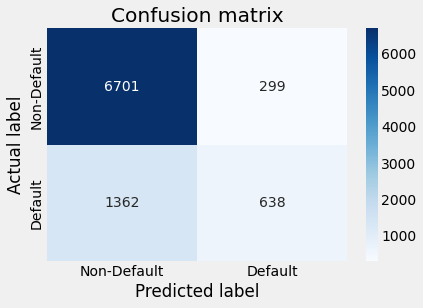

In [28]:
# create confustion matrix
CM = metrics.confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Non-Default', 'Default']); ax.yaxis.set_ticklabels(['Non-Default', 'Default'])

### ROC Curve 
**Receiver Operating Characteristic(ROC)** summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate. 

ROC summarizes the predictive power for all possible values of p > 0.5.  The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

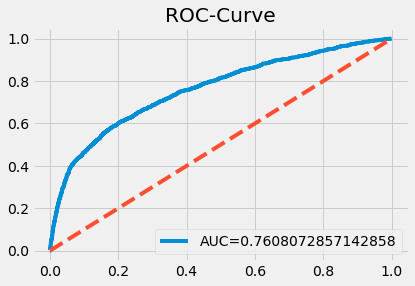

In [29]:
fpr, tpr, _=metrics.roc_curve(y_test, y_prob)
auc=metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

## 5.2 Logistic Regression with Default Regularization

In [30]:
# Pipeline
# Steps
steps_logit_reg = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('logit_reg', LogisticRegression())
                 ]

pl_logit_reg = Pipeline(steps_logit_reg)

In [31]:
pl_logit_reg.fit(X_train,y_train)
y_pred = pl_logit_reg.predict(X_test)  # predicted class label
y_prob = pl_logit_reg.predict_proba(X_test)[:, 1]   #predicted probability

In [32]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_reg = pd.DataFrame([['Logit_reg', acc,prec,rec, f1,roc]],
                                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg], axis=0, ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.3190,0.434457,0.760807
1,Logit_reg,0.815333,0.680556,0.3185,0.433924,0.760825


## 5.3 Stochastic Gradient Descent Classifier
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [33]:
# Pipeline
# Steps
steps_sgdc = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
              ('sgdc', SGDClassifier(loss='log', penalty='l2', alpha=0.0001, l1_ratio=0.15, learning_rate='optimal', random_state=1))
             ]

pl_sgdc = Pipeline(steps_sgdc)

In [34]:
pl_sgdc.fit(X_train,y_train)
y_pred = pl_sgdc.predict(X_test)  # predicted class label
y_prob = pl_sgdc.predict_proba(X_test)[:, 1]   #predicted probability

In [35]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_sgdc = pd.DataFrame([['SGDClassifier', acc,prec,rec, f1,roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg, results_sgdc], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.3190,0.434457,0.760807
1,Logit_reg,0.815333,0.680556,0.3185,0.433924,0.760825
2,SGDClassifier,0.816778,0.671890,0.3430,0.454154,0.741101


## 5.4 Decision Tree Classifier
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

#### Advantages of Decision Trees

Decision trees are easy to interpret.
To build a decision tree requires little data preparation from the user- there is no need to standardize data

#### Disadvantages of Decision Trees

Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper.


In [36]:
dtc = DecisionTreeClassifier(random_state=1)

In [37]:
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)  # predicted class label
y_prob = dtc.predict_proba(X_test)[:, 1]   #predicted probability

In [38]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results_dtc = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg, results_sgdc, results_dtc], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.3190,0.434457,0.760807
1,Logit_reg,0.815333,0.680556,0.3185,0.433924,0.760825
2,SGDClassifier,0.816778,0.671890,0.3430,0.454154,0.741101
3,Decision Tree,0.727111,0.390595,0.4070,0.398629,0.613432


## 5.5 SVM Classifier

In [39]:
svc = LinearSVC(random_state=1)

In [40]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)  # predicted class label

In [41]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = "N/A"

results_svc = pd.DataFrame([['SVM Classifier', acc,prec,rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg, results_sgdc, results_dtc, results_svc], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.3190,0.434457,0.760807
1,Logit_reg,0.815333,0.680556,0.3185,0.433924,0.760825
2,SGDClassifier,0.816778,0.671890,0.3430,0.454154,0.741101
3,Decision Tree,0.727111,0.390595,0.4070,0.398629,0.613432
4,SVM Classifier,0.744778,0.247878,0.0730,0.112785,N/A


In [42]:
results = pd.concat([results_logit, results_logit_reg, results_sgdc, results_dtc, results_svc], axis=0, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.3190,0.434457,0.760807
1,Logit_reg,0.815333,0.680556,0.3185,0.433924,0.760825
2,SGDClassifier,0.816778,0.671890,0.3430,0.454154,0.741101
3,Decision Tree,0.727111,0.390595,0.4070,0.398629,0.613432
4,SVM Classifier,0.744778,0.247878,0.0730,0.112785,N/A


# Step 6: Applying Oversampling and Undersampling for Imbalanced Classification

In [43]:
dataset['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

<AxesSubplot:title={'center':'Non-Default vs Default'}>

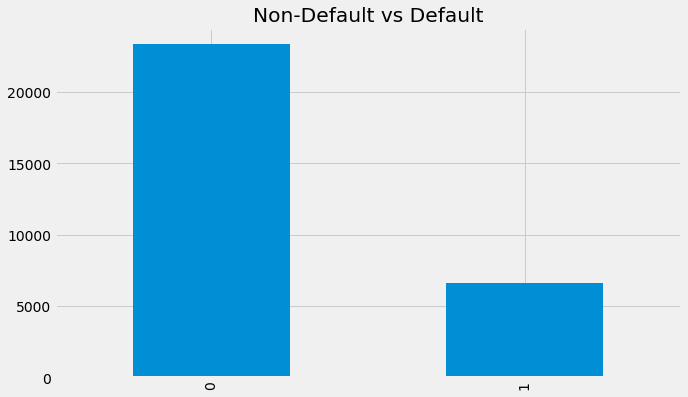

In [44]:
dataset['def_pay'].value_counts().plot(kind='bar', figsize=(10,6), title="Non-Default vs Default")

## 6.1 Random Oversampling

In [45]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Non-Default vs Default'}, xlabel='0'>

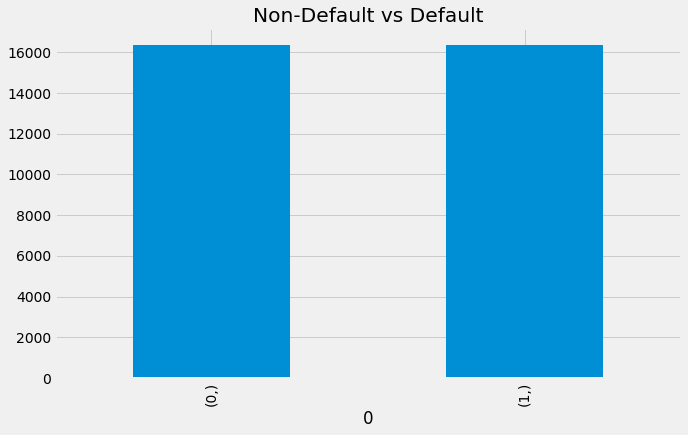

In [46]:
pd.DataFrame(y_train_over).value_counts(ascending=True).plot(kind='bar', figsize=(10,6), title="Non-Default vs Default")

In [47]:
# Logit
pl_logit.fit(X_train_over,y_train_over)
y_pred = pl_logit.predict(X_test)  # predicted class label
y_prob = pl_logit.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_over = pd.DataFrame([['Logit', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Logit with Regularization
pl_logit_reg.fit(X_train_over,y_train_over)
y_pred = pl_logit_reg.predict(X_test)  # predicted class label
y_prob = pl_logit_reg.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_reg_over = pd.DataFrame([['Logit_reg', acc,prec,rec, f1,roc]],
                                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# SGD Classifier
pl_sgdc.fit(X_train_over,y_train_over)
y_pred = pl_sgdc.predict(X_test)  # predicted class label
y_prob = pl_sgdc.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_sgdc_over = pd.DataFrame([['SGDClassifier', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Decision Tree Classifier
dtc.fit(X_train_over,y_train_over)
y_pred = dtc.predict(X_test)  # predicted class label
y_prob = dtc.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_dtc_over = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# SVM Classifier
svc.fit(X_train_over,y_train_over)
y_pred = svc.predict(X_test)  # predicted class label

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = "N/A"

results_svc_over = pd.DataFrame([['SVM Classifier', acc,prec,rec, f1, roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


results_over = pd.concat([results_logit_over, results_logit_reg_over, results_sgdc_over, results_dtc_over, 
                          results_svc_over], axis=0, ignore_index=True)

results_over

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.779556,0.503690,0.5460,0.523992,0.762534
1,Logit_reg,0.779556,0.503690,0.5460,0.523992,0.762538
2,SGDClassifier,0.767556,0.480574,0.5690,0.521062,0.756015
3,Decision Tree,0.728444,0.389442,0.3910,0.390220,0.607922
4,SVM Classifier,0.563111,0.277522,0.6025,0.380006,N/A


## 6.2 Random Undersampling

In [48]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Non-Default vs Default'}, xlabel='0'>

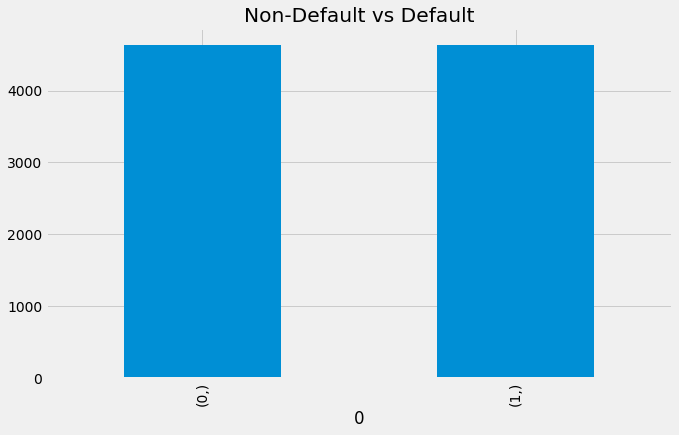

In [49]:
pd.DataFrame(y_train_under).value_counts(ascending=True).plot(kind='bar', figsize=(10,6), title="Non-Default vs Default")

In [50]:
# Logit
pl_logit.fit(X_train_under,y_train_under)
y_pred = pl_logit.predict(X_test)  # predicted class label
y_prob = pl_logit.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_under = pd.DataFrame([['Logit', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Logit with Regularization
pl_logit_reg.fit(X_train_under,y_train_under)
y_pred = pl_logit_reg.predict(X_test)  # predicted class label
y_prob = pl_logit_reg.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_reg_under = pd.DataFrame([['Logit_reg', acc,prec,rec, f1,roc]],
                                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# SGD Classifier
pl_sgdc.fit(X_train_under,y_train_under)
y_pred = pl_sgdc.predict(X_test)  # predicted class label
y_prob = pl_sgdc.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_sgdc_under = pd.DataFrame([['SGDClassifier', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Decision Tree Classifier
dtc.fit(X_train_under,y_train_under)
y_pred = dtc.predict(X_test)  # predicted class label
y_prob = dtc.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_dtc_under = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# SVM Classifier
svc.fit(X_train_under,y_train_under)
y_pred = svc.predict(X_test)  # predicted class label

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = "N/A"

results_svc_under = pd.DataFrame([['SVM Classifier', acc,prec,rec, f1, roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


results_under = pd.concat([results_logit_under, results_logit_reg_under, results_sgdc_under, results_dtc_under, 
                          results_svc_under], axis=0, ignore_index=True)

results_under

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.779778,0.504080,0.5560,0.528768,0.761776
1,Logit_reg,0.779778,0.504080,0.5560,0.528768,0.761796
2,SGDClassifier,0.668444,0.369079,0.6935,0.481765,0.745701
3,Decision Tree,0.621111,0.315638,0.6035,0.414492,0.614736
4,SVM Classifier,0.756778,0.393461,0.1745,0.241773,N/A


## 6.3 Synthetic Minority Oversampling Technique (SMOTE)

In [51]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Non-Default vs Default'}, xlabel='0'>

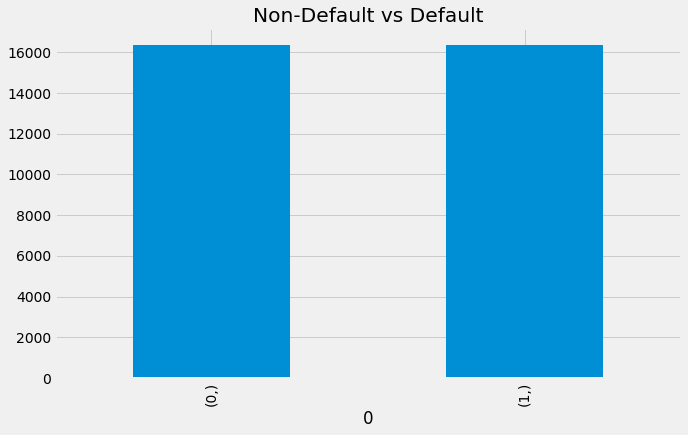

In [52]:
pd.DataFrame(y_train_smote).value_counts(ascending=True).plot(kind='bar', figsize=(10,6), title="Non-Default vs Default")

In [53]:
# Logit
pl_logit.fit(X_train_smote,y_train_smote)
y_pred = pl_logit.predict(X_test)  # predicted class label
y_prob = pl_logit.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_smote = pd.DataFrame([['Logit', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Logit with Regularization
pl_logit_reg.fit(X_train_smote,y_train_smote)
y_pred = pl_logit_reg.predict(X_test)  # predicted class label
y_prob = pl_logit_reg.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_reg_smote = pd.DataFrame([['Logit_reg', acc,prec,rec, f1,roc]],
                                       columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# SGD Classifier
pl_sgdc.fit(X_train_smote,y_train_smote)
y_pred = pl_sgdc.predict(X_test)  # predicted class label
y_prob = pl_sgdc.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_sgdc_smote = pd.DataFrame([['SGDClassifier', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# Decision Tree Classifier
dtc.fit(X_train_smote,y_train_smote)
y_pred = dtc.predict(X_test)  # predicted class label
y_prob = dtc.predict_proba(X_test)[:, 1]   #predicted probability

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_dtc_smote = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


# SVM Classifier
svc.fit(X_train_smote,y_train_smote)
y_pred = svc.predict(X_test)  # predicted class label

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = "N/A"

results_svc_smote = pd.DataFrame([['SVM Classifier', acc,prec,rec, f1, roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])


results_smote = pd.concat([results_logit_smote, results_logit_reg_smote, results_sgdc_smote, results_dtc_smote, 
                          results_svc_smote], axis=0, ignore_index=True)

results_smote

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.780111,0.504904,0.5405,0.522096,0.761325
1,Logit_reg,0.780111,0.504904,0.5405,0.522096,0.761323
2,SGDClassifier,0.769333,0.483005,0.5400,0.509915,0.741349
3,Decision Tree,0.719667,0.379881,0.4135,0.395978,0.610439
4,SVM Classifier,0.372000,0.250410,0.9160,0.393302,N/A


In [54]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.815444,0.680896,0.3190,0.434457,0.760807
1,Logit_reg,0.815333,0.680556,0.3185,0.433924,0.760825
2,SGDClassifier,0.816778,0.671890,0.3430,0.454154,0.741101
3,Decision Tree,0.727111,0.390595,0.4070,0.398629,0.613432
4,SVM Classifier,0.744778,0.247878,0.0730,0.112785,N/A


In [55]:
results_over

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.779556,0.503690,0.5460,0.523992,0.762534
1,Logit_reg,0.779556,0.503690,0.5460,0.523992,0.762538
2,SGDClassifier,0.767556,0.480574,0.5690,0.521062,0.756015
3,Decision Tree,0.728444,0.389442,0.3910,0.390220,0.607922
4,SVM Classifier,0.563111,0.277522,0.6025,0.380006,N/A


In [56]:
results_under

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.779778,0.504080,0.5560,0.528768,0.761776
1,Logit_reg,0.779778,0.504080,0.5560,0.528768,0.761796
2,SGDClassifier,0.668444,0.369079,0.6935,0.481765,0.745701
3,Decision Tree,0.621111,0.315638,0.6035,0.414492,0.614736
4,SVM Classifier,0.756778,0.393461,0.1745,0.241773,N/A


In [57]:
results_smote

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.780111,0.504904,0.5405,0.522096,0.761325
1,Logit_reg,0.780111,0.504904,0.5405,0.522096,0.761323
2,SGDClassifier,0.769333,0.483005,0.5400,0.509915,0.741349
3,Decision Tree,0.719667,0.379881,0.4135,0.395978,0.610439
4,SVM Classifier,0.372000,0.250410,0.9160,0.393302,N/A


## Conclusion: For imbalanced classificaiton problems, the use of random oversampling, random undersampling, and SMOTE can improve the recall and F1 score.  Such improvements are particularly substantial for SVM Classifier.   